In [17]:
import numpy as np

M = 12
mu = np.linspace(0, 1, M)
mu[0] = 1

def h(X):    
    return np.sin(2 * np.pi * X)

def phi(x, mu):
    return np.exp(-1000/2 * (x-mu)**2)

def generate_dataset(size):
    X = np.random.uniform(size=size)
    T = np.sin(2 * np.pi * X) + 0.5 * np.random.normal(size = size)
    return (X,T)

def generate_datasets(count, size):
    return [generate_dataset(size) for i in range(count)]

def Phi(X):
    Phi = np.zeros((len(X),M))
    for i in range(len(X)):
        for j in range(M):
            Phi[i,j] = phi(X[i], mu[j])
    return Phi

def fit_model(X, T, lam):
    inv = np.linalg.inv(lam * np.identity(M) + X.T.dot(X))
    W_opt = inv.dot(X.T).dot(T)
    return W_opt

def predict(X, W):
    return X.dot(W)

def bias(W, X):
    return np.mean(np.abs(predict(Phi(X), W) - h(X)))

def var(W, X):
    return np.mean((predict(Phi(X), W) - np.mean(predict(Phi(X), W)))**2)

def noise(X, T):
    return np.mean((h(X) - T)**2)

L = 10
N = 25
Z = np.linspace(-2, 3, 100)
D = generate_datasets(L, N)

lambdas = np.logspace(-2, 1, 8)

B = np.zeros(len(lambdas))
V = np.zeros(len(lambdas))
N = np.zeros(len(lambdas))
EL = np.zeros(len(lambdas))
W = np.zeros((len(lambdas),len(D),M))

for i in range(len(lambdas)):
    models = [(X, T, fit_model(Phi(X), T, lambdas[i])) for X,T in D]
    B[i] = np.mean([bias(W, X) for X,_,W in models])**2
    V[i] = np.mean([var(W, X) for X,_,W in models])
    N[i] = np.mean([noise(X, T) for X,T,_ in models])
    EL[i] = B[i] + V[i] + N[i]
    for j in range(len(models)):
        _, _, W[i,j] = models[j]

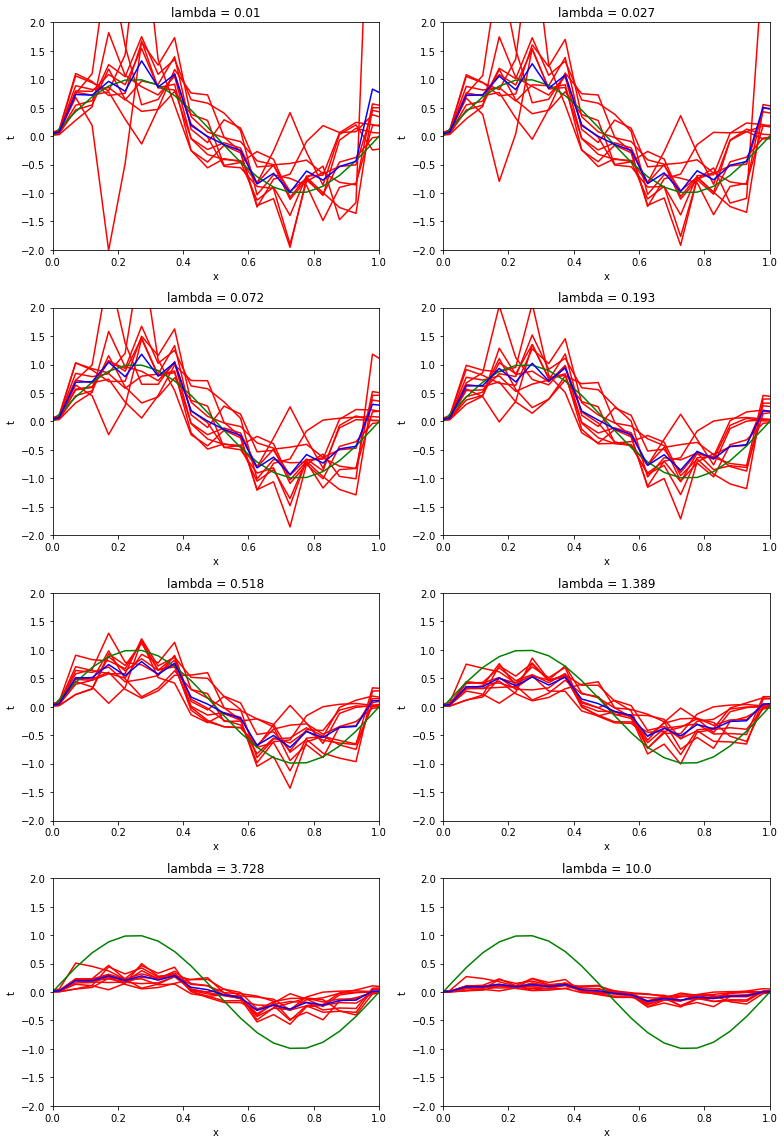

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(11,4*len(lambdas)/2))
for i in range(len(lambdas)):
    plt.subplot(len(lambdas)/2, 2, i+1)
    for j in range(len(D)):
        plt.plot(Z, predict(Phi(Z), W[i,j]), c = 'red')
    plt.plot(Z, h(Z), c = 'green')
    plt.plot(Z, predict(Phi(Z), np.mean(W[i], axis = 0)), c='blue')
    
    plt.xlabel("x")
    plt.ylabel("t")
    plt.xlim([0,1])
    plt.ylim([-2,2])
    plt.title("lambda = " + str(np.round(lambdas[i],3)))
plt.tight_layout()
plt.show()

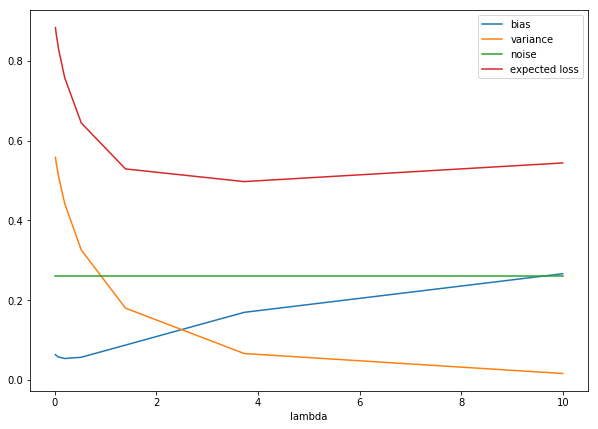

In [21]:
plt.figure(figsize=(10,7)) 
plt.plot(lambdas, B, label = "bias")
plt.plot(lambdas, V, label = "variance")
plt.plot(lambdas, N, label = "noise")
plt.plot(lambdas, EL, label = "expected loss")
plt.legend()
plt.xlabel('lambda')
plt.show()